In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chuqiao: chill/slow music, romantic, holiday, workout, party 
# Find the features that are most correlated/important within each of these moods

# Load the dataset
file_path = "merged_playlist_without_duplicates_0_999.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.lower()

def search_playlists_by_name(df, mood):
    #Filter playlists based on whether the search string is in the playlist name
    matching_playlists = df[df['playlist_name'].str.contains(mood, case=False, na=False)]
    #Return the playlists and their IDs
    playlists_and_ids = matching_playlists[['playlist_name', 'playlist_id']].drop_duplicates()
    #print(playlists_and_ids)
    return playlists_and_ids

def extract_playlist_ids_to_list(playlists_and_ids):
    # Convert playlist IDs to a list of integers
    playlist_ids_list = playlists_and_ids['playlist_id'].astype(int).tolist()
    return playlist_ids_list


def plot_correlation_matrix_and_bar_plots(df, playlist_ids, mood):
    playlist_ids = list(playlist_ids) if isinstance(playlist_ids, (list, int)) else [playlist_ids]
    
    # Filter the DataFrame to include only the specified playlist IDs
    selected_playlists = df[df['playlist_id'].isin(playlist_ids)]
    
    # Drop irrelevant columns
    selected_playlists = selected_playlists.drop(['playlist_id', 'duration_ms'], axis=1)
    
    # Calculate the correlation matrix
    correlation_matrix = selected_playlists.corr()

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix for Mood: {mood}')
    plt.show()

    # Extract positive and negative correlations
    positive_correlations = correlation_matrix[correlation_matrix > 0].stack().reset_index()
    negative_correlations = correlation_matrix[correlation_matrix < 0].stack().reset_index()

    # Plot positive correlations
    plt.figure(figsize=(14, 8))
    sns.barplot(data=positive_correlations, x='level_0', y=0, hue='level_1', dodge=True)
    plt.title(f'Positive Correlations for Mood: {mood}')
    plt.xlabel('Features')
    plt.ylabel('Correlation Value')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='With Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Plot negative correlations
    plt.figure(figsize=(14, 8))
    sns.barplot(data=negative_correlations, x='level_0', y=0, hue='level_1', dodge=True)
    plt.title(f'Negative Correlations for Mood: {mood}')
    plt.xlabel('Features')
    plt.ylabel('Correlation Value')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='With Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

Feature Plot for slow

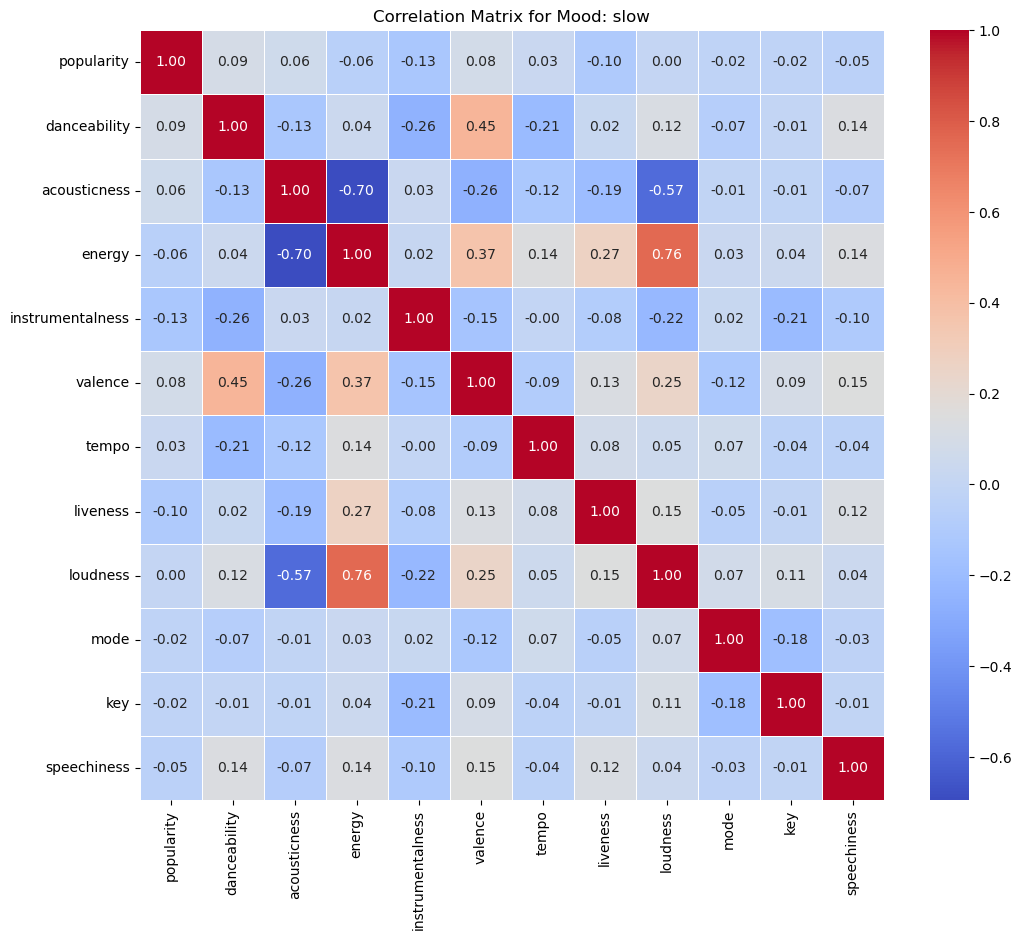

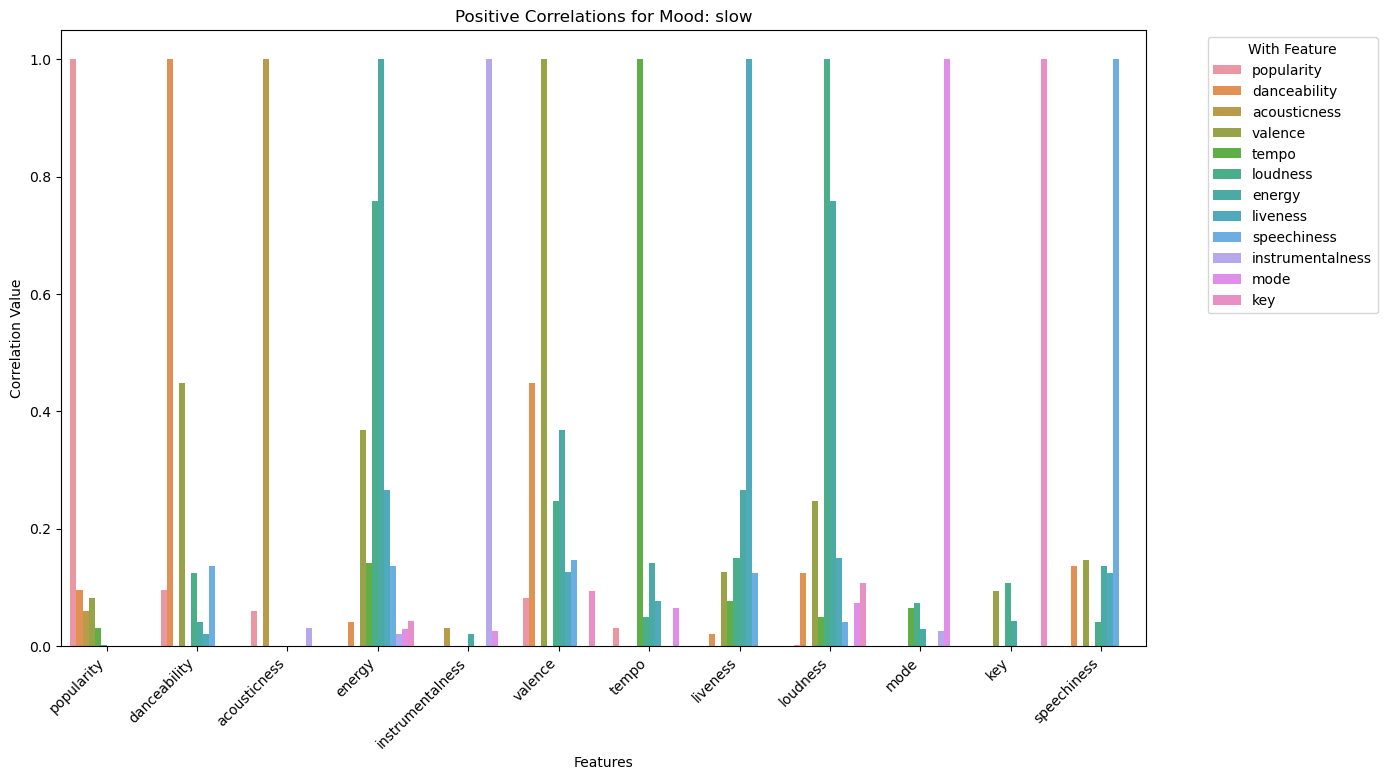

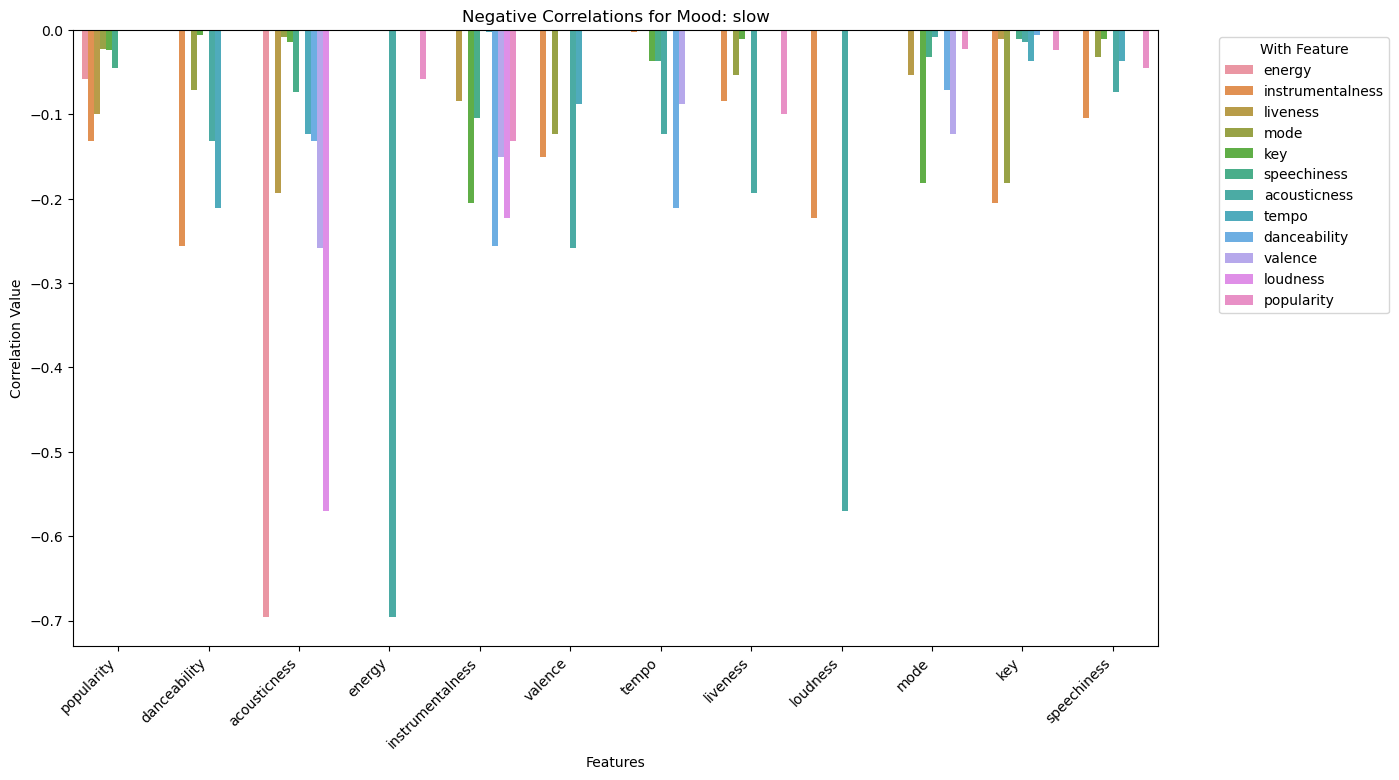

In [3]:
search_string = "slow"
matching_playlists = search_playlists_by_name(df, search_string)
playlist_ids_string = extract_playlist_ids_to_list(matching_playlists)
plot_correlation_matrix_and_bar_plots(df, playlist_ids_string, search_string)

Feature Plot for love(romantic)

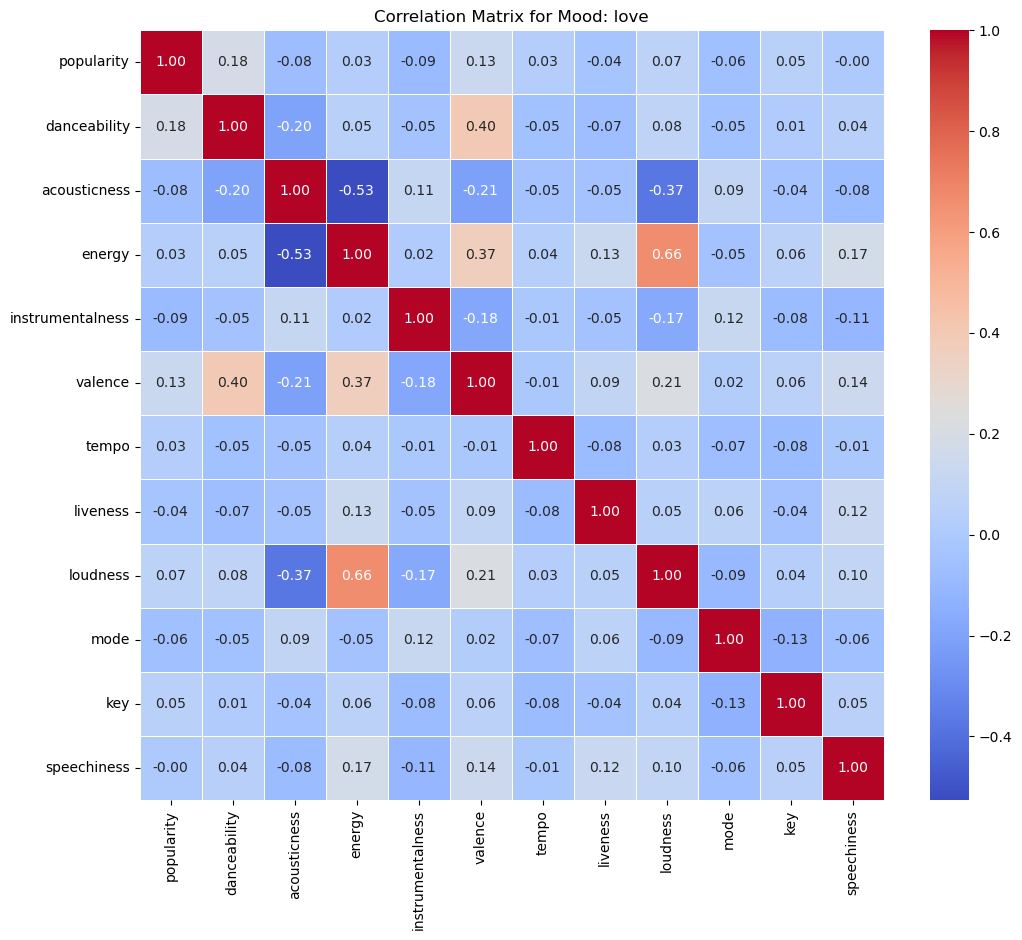

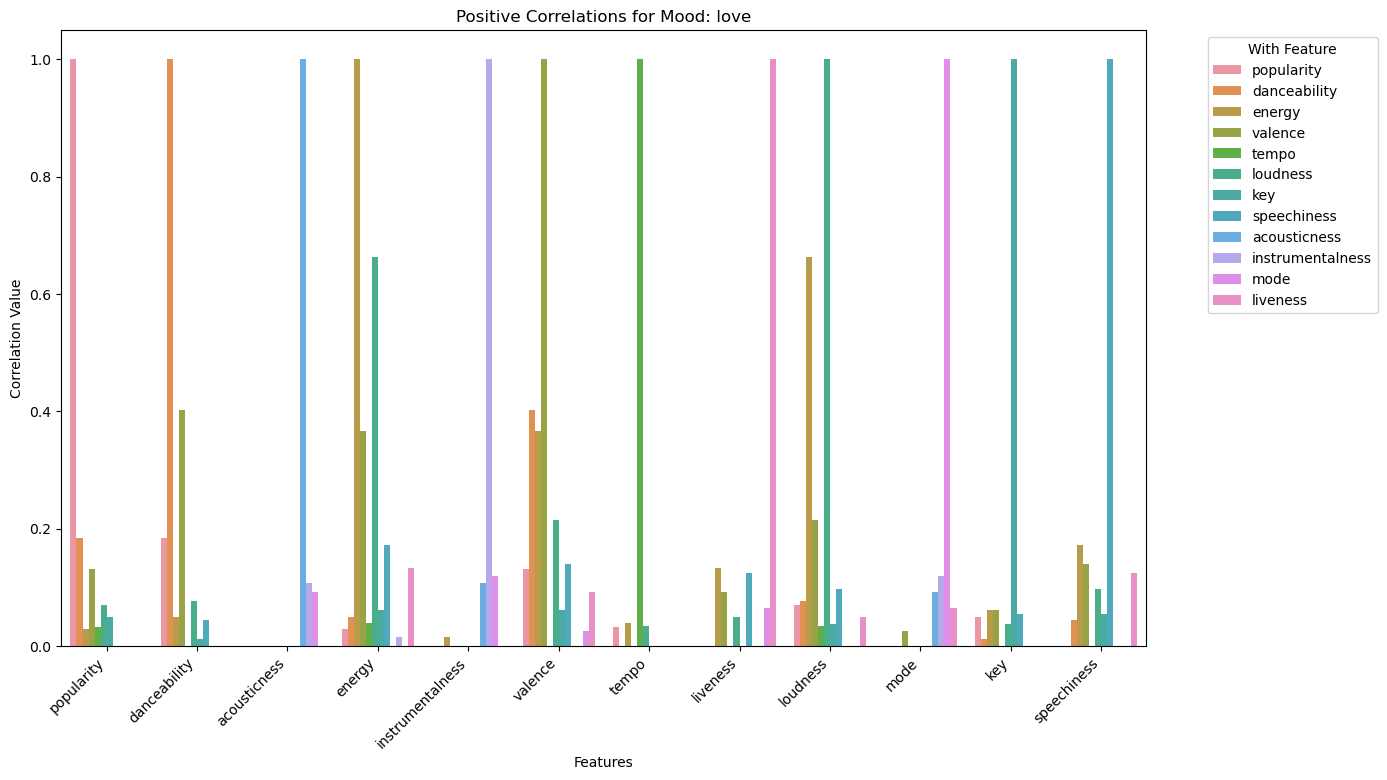

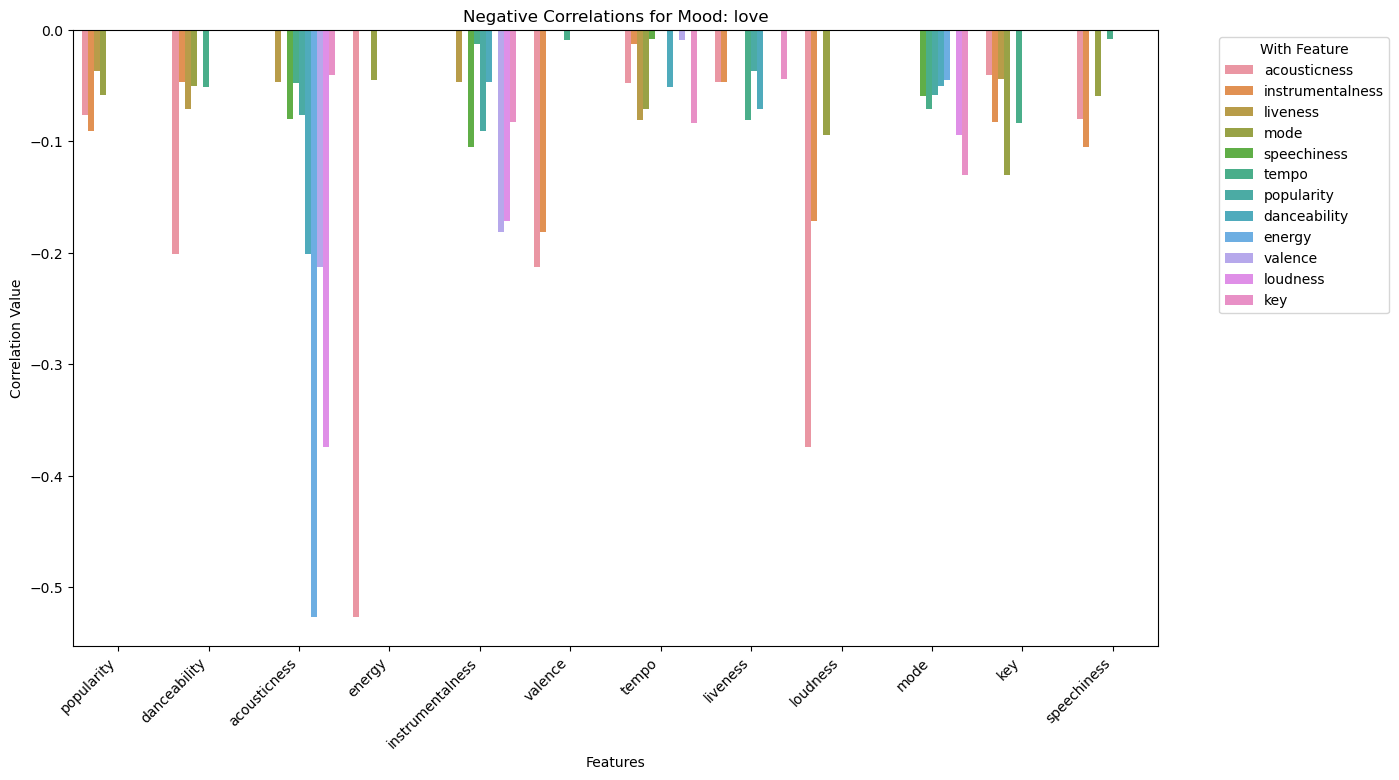

In [4]:
search_string = "love"
matching_playlists = search_playlists_by_name(df, search_string)
playlist_ids_string = extract_playlist_ids_to_list(matching_playlists)
plot_correlation_matrix_and_bar_plots(df, playlist_ids_string, search_string)

Feature Plot for holiday

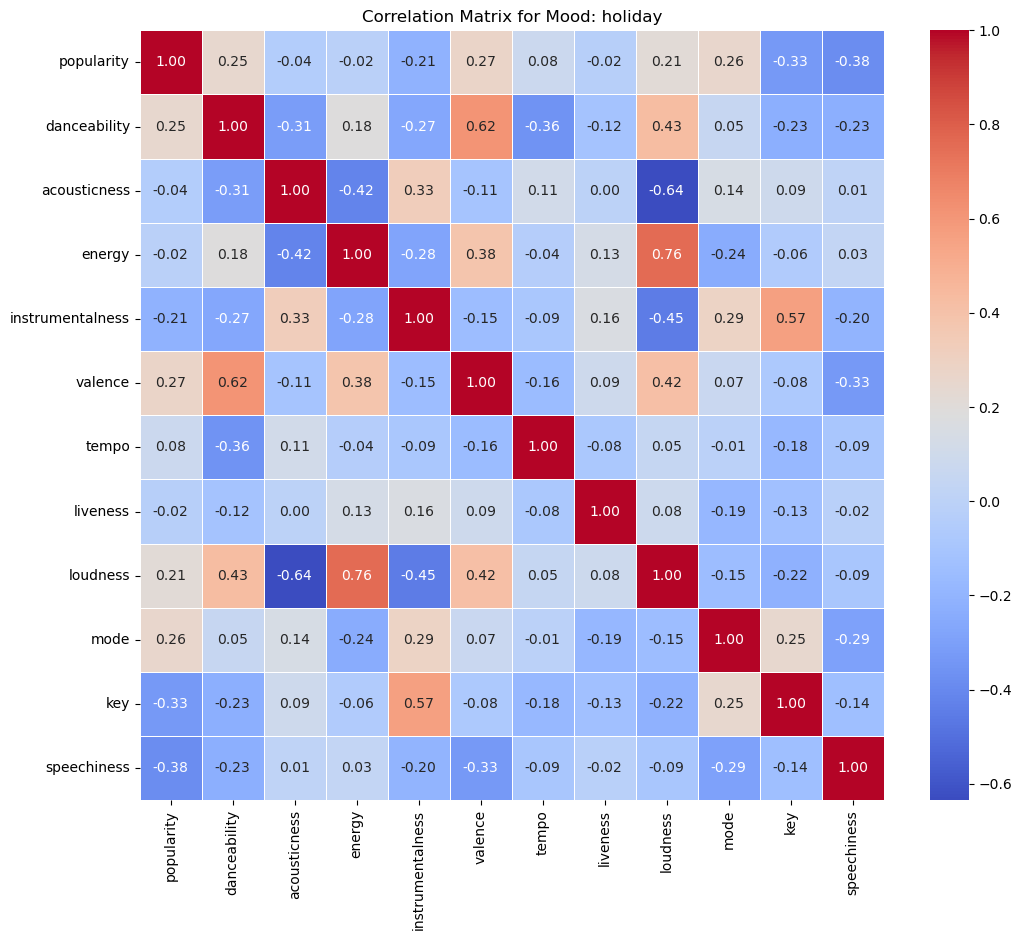

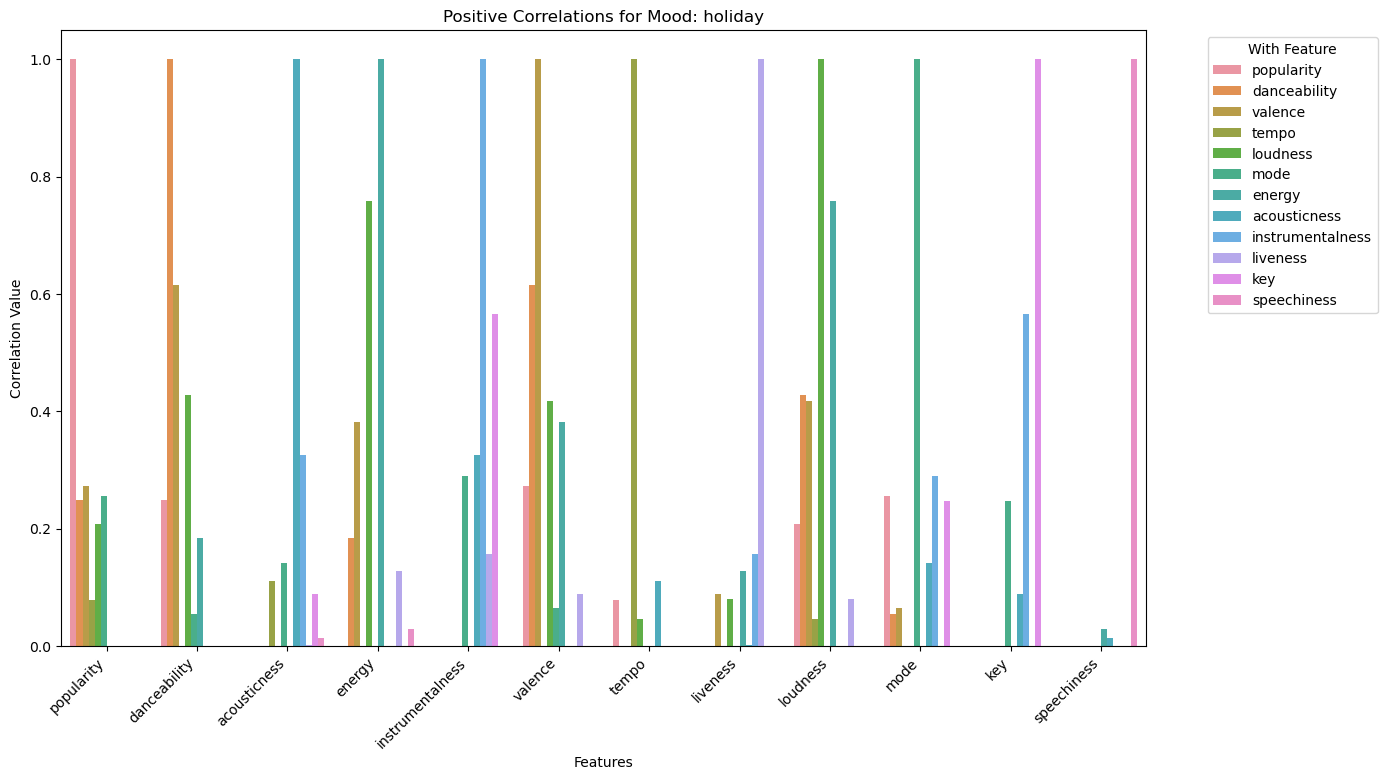

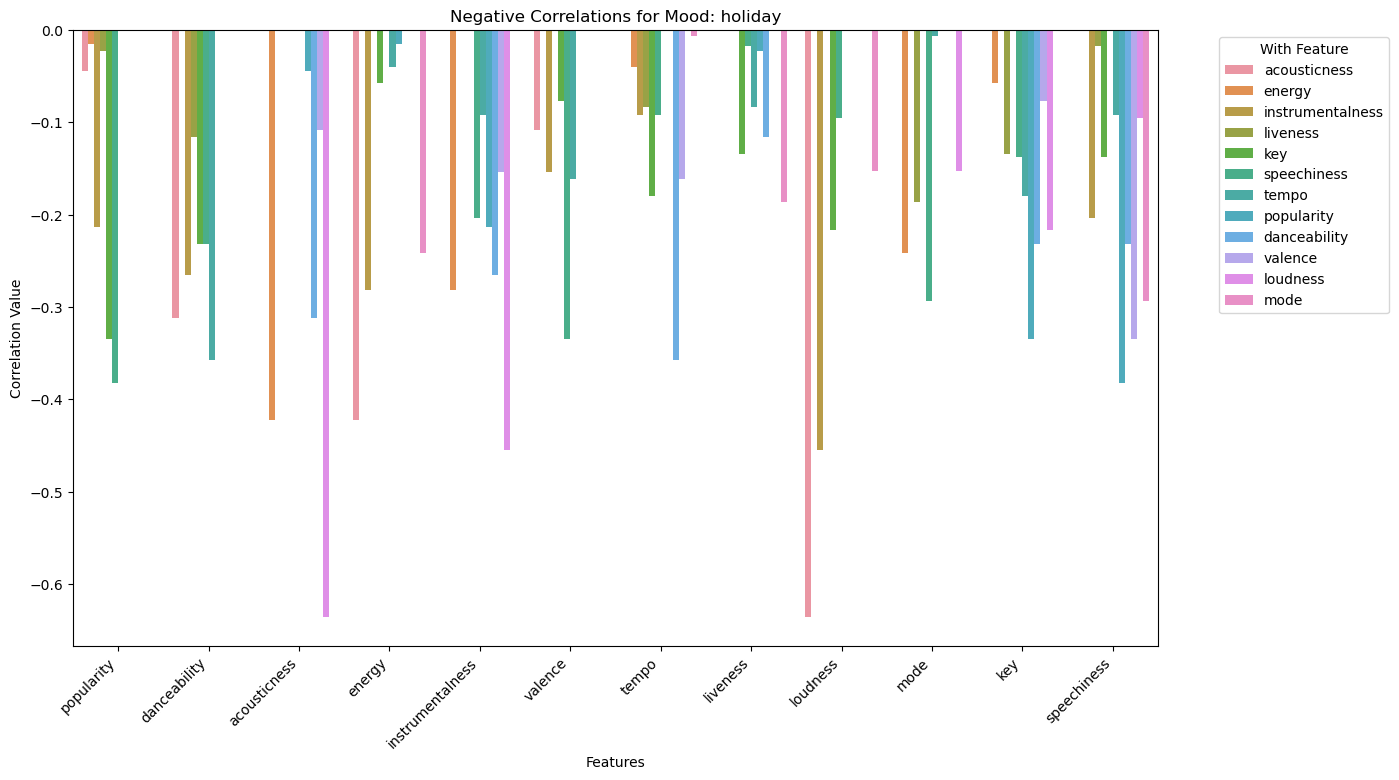

In [5]:
search_string = "holiday"
matching_playlists = search_playlists_by_name(df, search_string)
playlist_ids_string = extract_playlist_ids_to_list(matching_playlists)
plot_correlation_matrix_and_bar_plots(df, playlist_ids_string, search_string)

Feature plot for workout

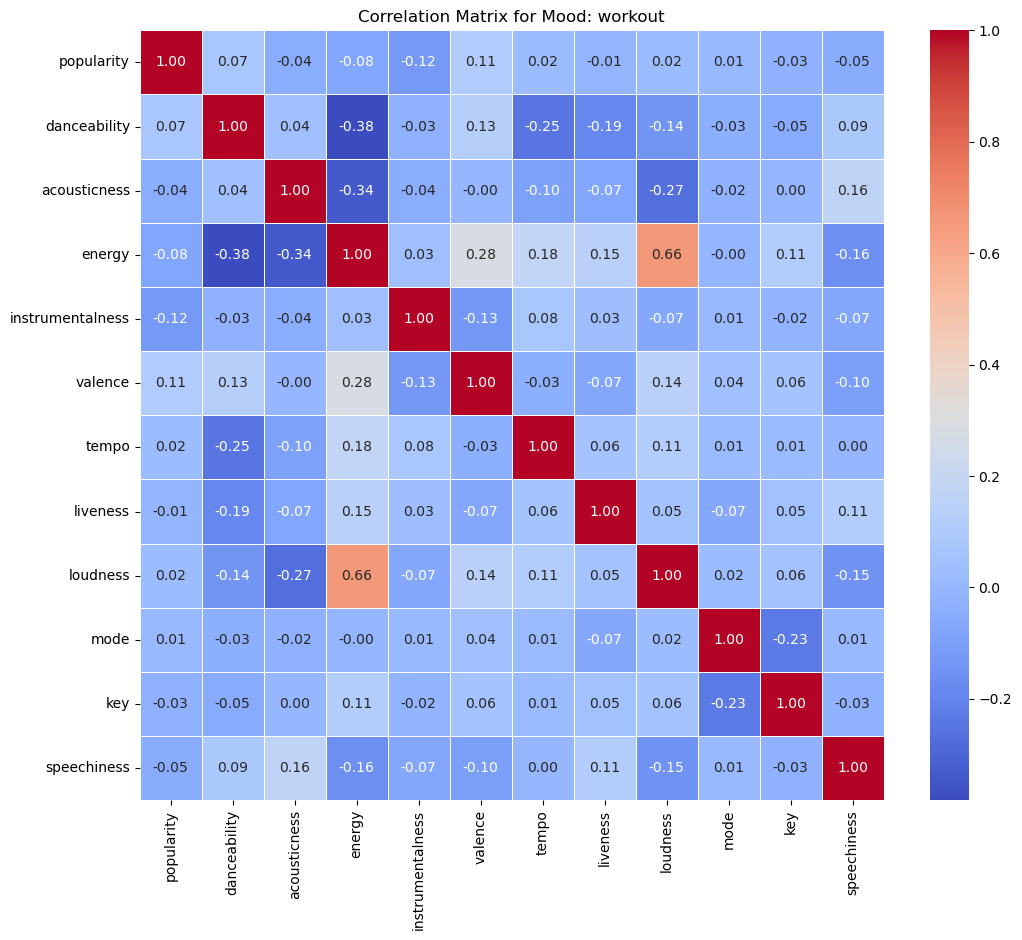

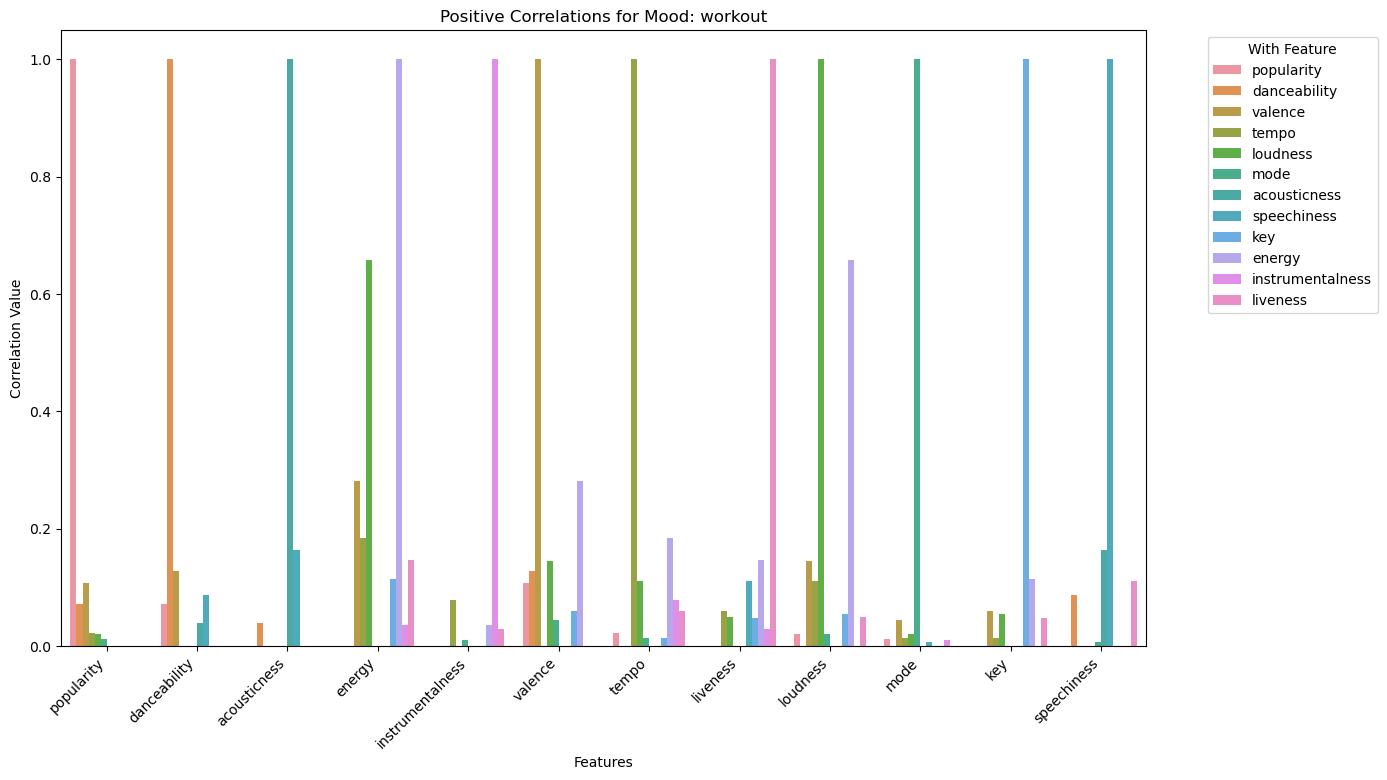

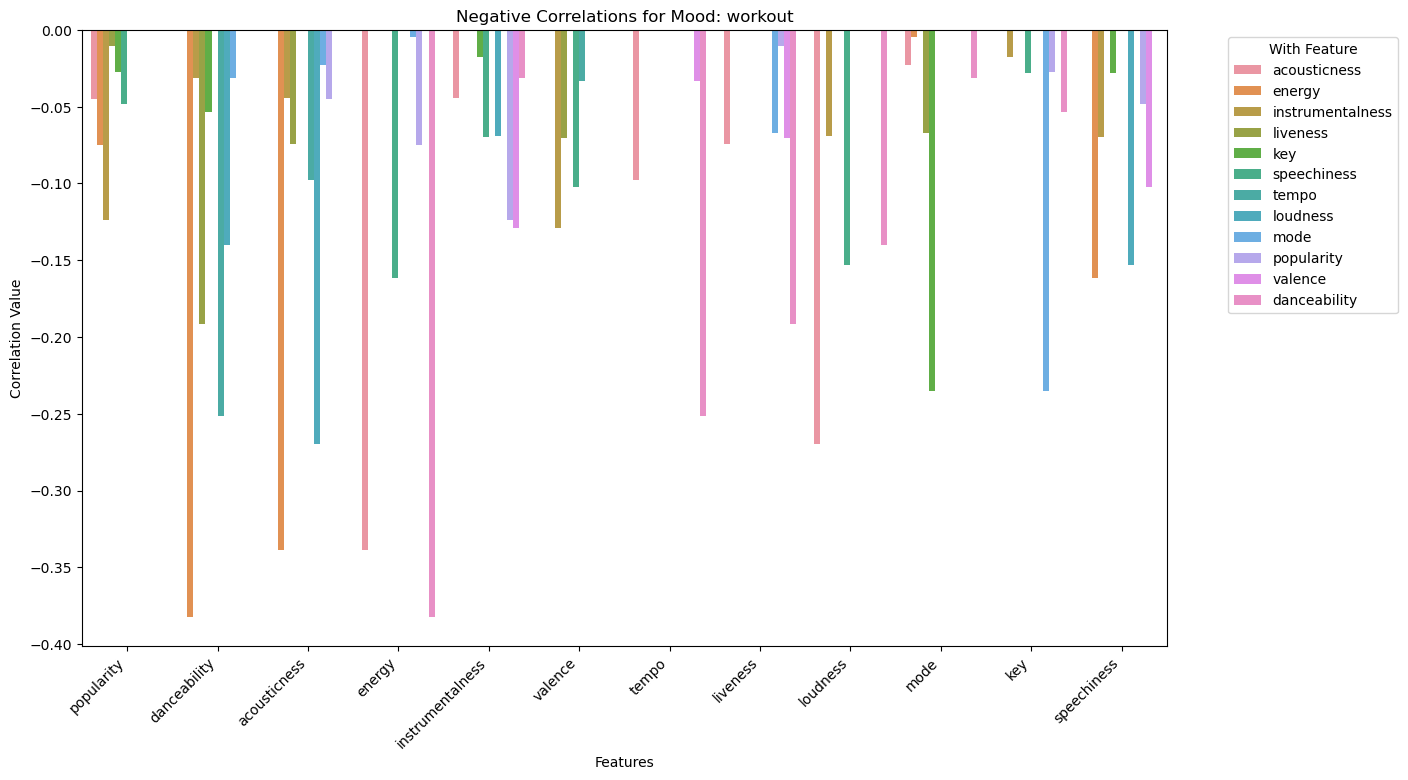

In [6]:
search_string = "workout"
matching_playlists = search_playlists_by_name(df, search_string)
playlist_ids_string = extract_playlist_ids_to_list(matching_playlists)
plot_correlation_matrix_and_bar_plots(df, playlist_ids_string, search_string)

Feature plot for party

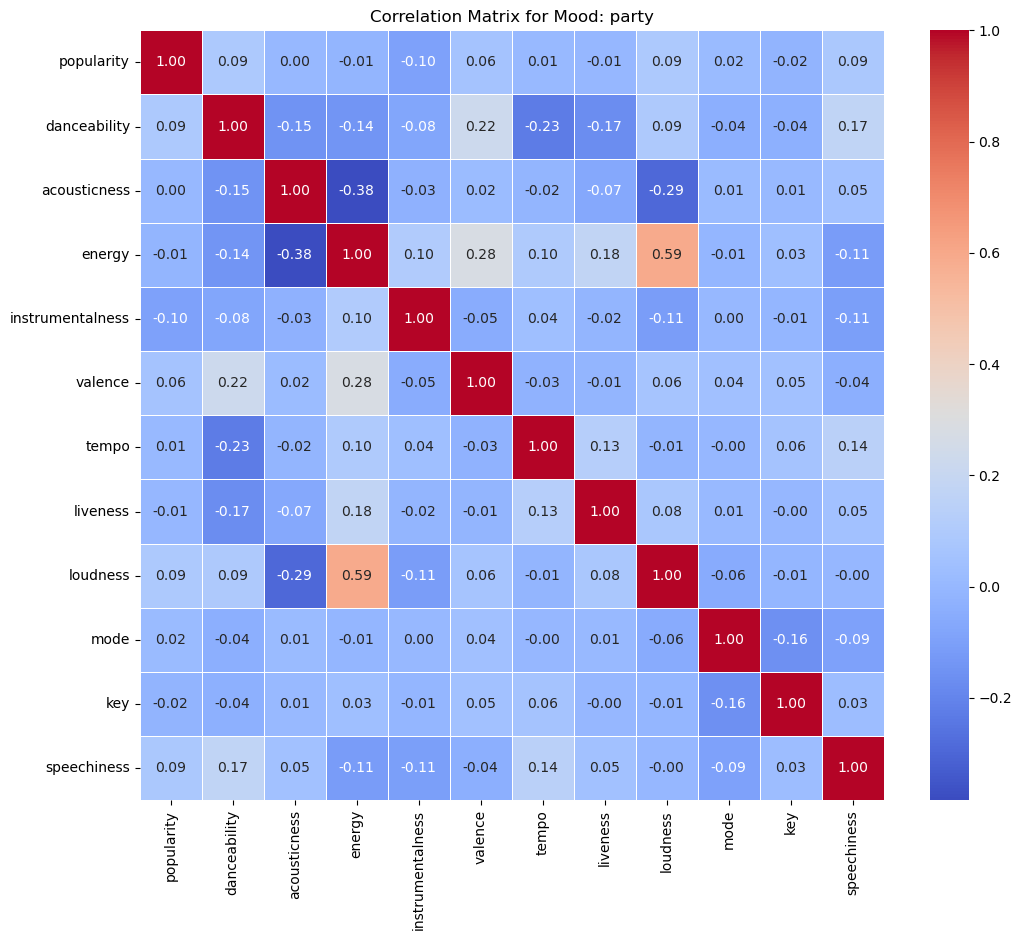

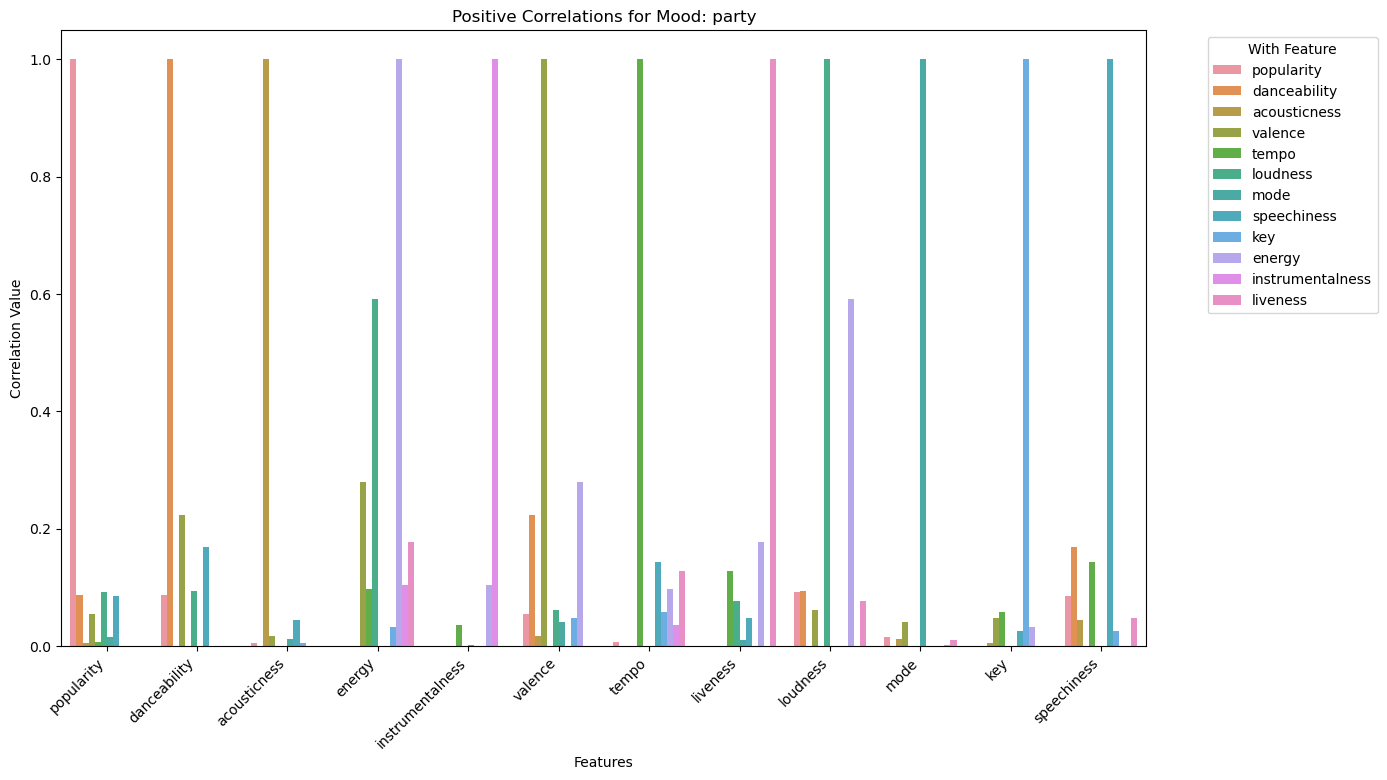

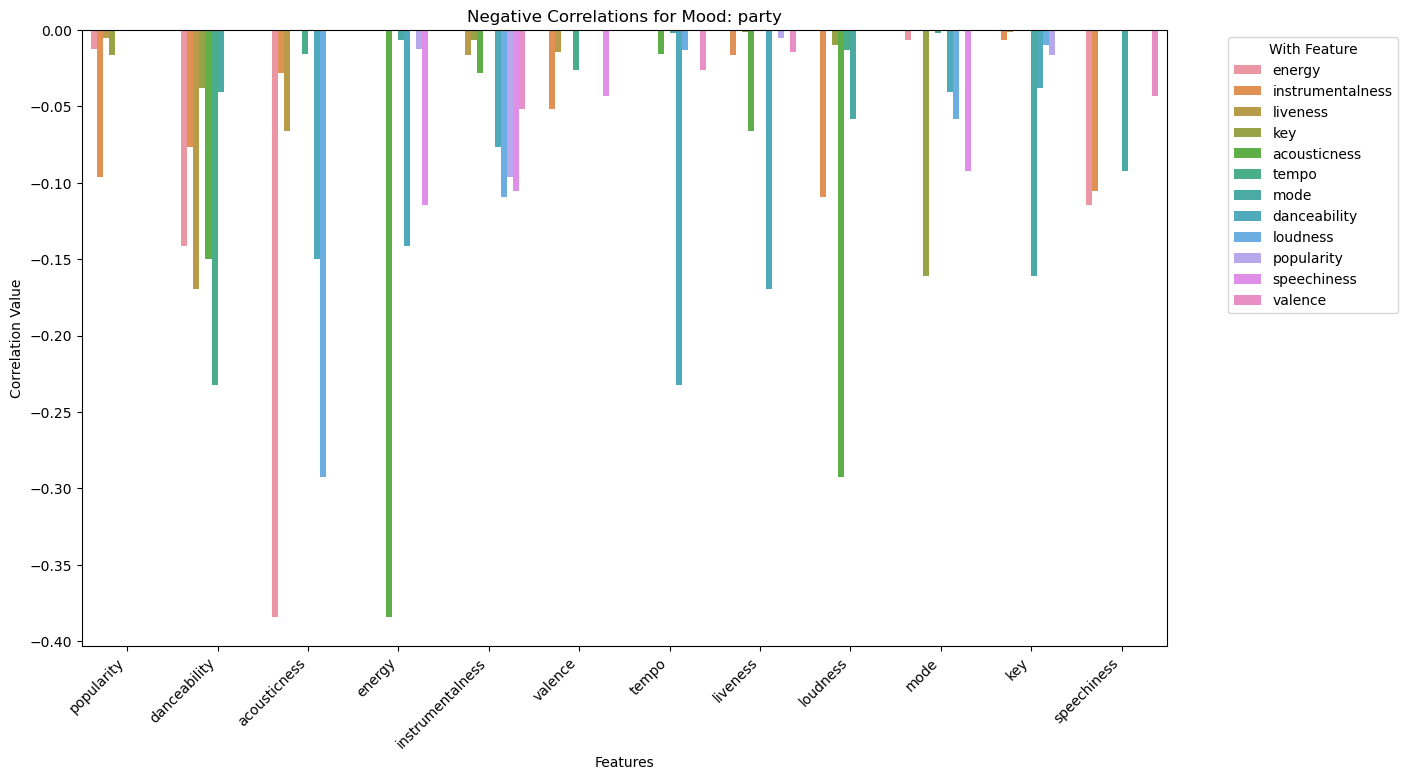

In [7]:
search_string = "party"
matching_playlists = search_playlists_by_name(df, search_string)
playlist_ids_string = extract_playlist_ids_to_list(matching_playlists)
plot_correlation_matrix_and_bar_plots(df, playlist_ids_string, search_string)